In [230]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [231]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [232]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy.orm import sessionmaker #Brough in from google search
from sqlalchemy import create_engine, func
from sqlalchemy import Table, Column, Integer, String, MetaData #Brough in from google search
from sqlalchemy.ext.declarative import declarative_base

In [233]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [234]:
# reflect an existing database into a new model
# Base = sqlalchemy.ext.automap.automap_base()
Base = automap_base()
Base.prepare(engine, reflect=True)

# Get the table names
inspector = sqlalchemy.inspect(engine)
table_names = inspector.get_table_names()

for table_name in table_names:
    print(table_name)

measurement
station


In [235]:
# View all of the classes that automap found
# Get a list of all the class names
class_names = Base.classes.keys()

# Print the class names
for class_name in class_names:
    print(class_name)

measurement
station


In [236]:
print(measurement.__table__.columns.keys())
print(station.__table__.columns.keys())

['id', 'station', 'date', 'prcp', 'tobs']
['id', 'station', 'name', 'latitude', 'longitude', 'elevation']


In [237]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station 

In [238]:
# Create our session (link) from Python to the DB
Session = sessionmaker(bind=engine)
session = Session()

In [239]:
results = session.query(measurement).limit(5).all() # Limit the results to the first 5 rows

for row in results:
    print(row.id, row.station, row.date, row.prcp, row.tobs)

1 USC00519397 2010-01-01 0.08 65.0
2 USC00519397 2010-01-02 0.0 63.0
3 USC00519397 2010-01-03 0.0 74.0
4 USC00519397 2010-01-04 0.0 76.0
5 USC00519397 2010-01-06 None 73.0


In [240]:
results = session.query(station).limit(5).all() # Limit the results to the first 5 rows

for row in results:
    print(row.id, row.station, row.name, row.latitude, row.longitude, row.elevation)

1 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
2 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
3 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
4 USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
5 USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6


# Exploratory Precipitation Analysis

In [241]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date)).scalar()

print("The most recent date in the dataset:", most_recent_date)

The most recent date in the dataset: 2017-08-23


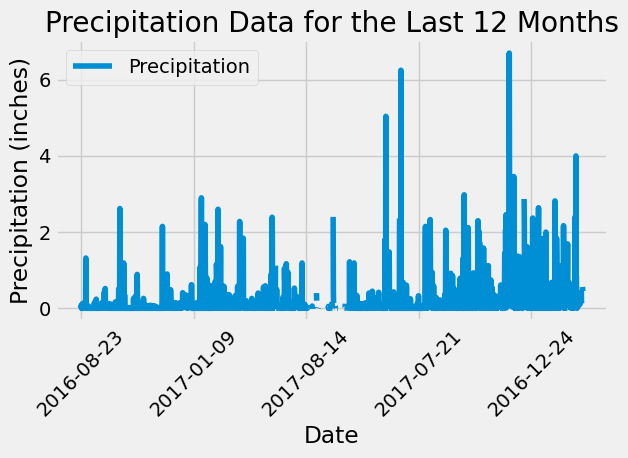

In [242]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previous_year = session.query(func.date(func.max(measurement.date), '-12 months')).scalar()

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= previous_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])
prcp_df.set_index('Date', inplace=True)
# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(rot=45)
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation Data for the Last 12 Months')
plt.tight_layout()
plt.show()

In [253]:
# Use Pandas to calculate the summary statistics for the precipitation data
count = prcp_df['Precipitation'].count()
mean = prcp_df['Precipitation'].mean()
std = prcp_df['Precipitation'].std()
min = prcp_df['Precipitation'].min()
Quantile25 = prcp_df['Precipitation'].quantile(0.25)
Quantile50 = prcp_df['Precipitation'].quantile(0.50)
Quantile75 = prcp_df['Precipitation'].quantile(0.75)
max = prcp_df['Precipitation'].max()

print(f"Count: {count:.6f}")
print(f"Mean: {mean:.6f}")
print(f"Standard Deviation: {std:.6f}")
print(f"Min: {min:.6f}")
print(f"25th Quantile: {Quantile25:.6f}")
print(f"50th Quantile: {Quantile50:.6f}")
print(f"75th Quantile: {Quantile75:.6f}")
print(f"Max: {max:.6f}")

Count: 2021.000000
Mean: 0.177279
Standard Deviation: 0.461190
Min: 0.000000
25th Quantile: 0.000000
50th Quantile: 0.020000
75th Quantile: 0.130000
Max: 6.700000


# Exploratory Station Analysis

In [259]:
# Design a query to calculate the total number of stations in the dataset
total_stations = 'stations'
unique_stations = prcp_df[station].value_counts()

for value, count in unique_counts.items():
    print(f"{value}: {count}")

TypeError: __init__() takes 1 positional argument but 2 were given

In [256]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

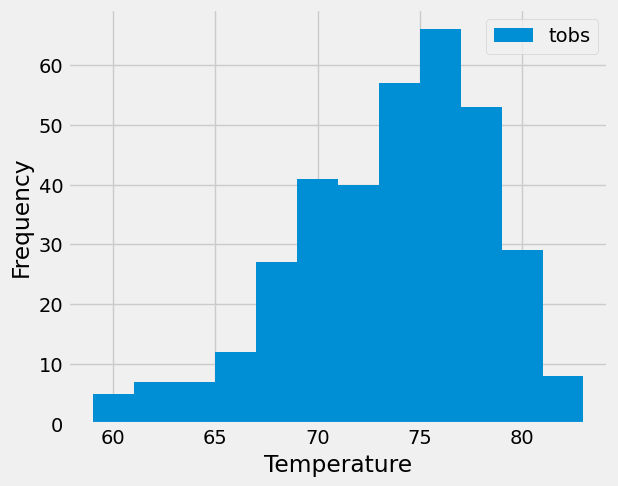

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()